In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Dataset API
!kaggle competitions download -c cifar-10

100% 713M/715M [00:11<00:00, 40.7MB/s]
100% 715M/715M [00:11<00:00, 65.7MB/s]


In [ ]:
!ls


cifar-10.zip  kaggle.json  sample_data


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracted!')

Extracted!


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.3 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filename=os.listdir('/content/train')

In [ ]:
type(filename)

list

In [ ]:
len(filename)

50000

In [ ]:
print(filename[:10])
print(filename[-10:])

['44219.png', '11794.png', '16506.png', '35632.png', '33996.png', '23041.png', '43383.png', '2844.png', '1769.png', '48463.png']
['19207.png', '469.png', '49647.png', '32795.png', '12544.png', '33168.png', '49782.png', '44890.png', '24228.png', '49734.png']


Processing the Labels

In [ ]:
label_df=pd.read_csv('/content/trainLabels.csv')

In [ ]:
label_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
label_df.shape

(50000, 2)

In [ ]:
label_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


checking the distrubution of labels for eveness

In [ ]:
label_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
label_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

Encoding the labels and mapping the labels to the corresponding value in the list

In [ ]:
label_dictionary = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = label_df['label'].map(label_dictionary).tolist()


In [ ]:
print(labels[:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


Displaying a Sample Image from the training set

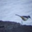

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/49996.png')
cv2_imshow(img)

In [ ]:
label_df[label_df['id'] == 49996]

,id,label
49995,49996,bird


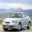

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/49999.png')
cv2_imshow(img)

In [ ]:
label_df[label_df['id'] == 49999]

,id,label
49998,49999,automobile


In [ ]:
id_list=list(label_df['id'])

In [ ]:
print(id_list[:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing : Converting images into numpy array

In [ ]:
train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
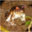

In [ ]:
data[0]

Converting image list and label list into numpy array

In [ ]:
X=np.array(data)
Y=np.array(labels)

In [ ]:
type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


Splitting the training & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


normalizibg the data by Scaling the Data

In [ ]:
X_train_normalized = X_train/255
X_test_normalized = X_test/255

In [ ]:
X_train_normalized

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

Building the Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
no_of_classes = 10

# Layers of neural network

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(no_of_classes, activation='softmax')
])

In [ ]:
# compile the neural network
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               393344    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the neural network
history1 = model1.fit(X_train_normalized, Y_train, batch_size=32, validation_split=0.1, epochs=25)

Epoch 1/25
1125/1125 [==============================] - 5s 3ms/step - loss: 1.9345 - acc: 0.3054 - val_loss: 1.7739 - val_acc: 0.3568
Epoch 2/25
1125/1125 [==============================] - 5s 4ms/step - loss: 1.7903 - acc: 0.3569 - val_loss: 1.7644 - val_acc: 0.3528
Epoch 3/25
1125/1125 [==============================] - 5s 4ms/step - loss: 1.7331 - acc: 0.3761 - val_loss: 1.7224 - val_acc: 0.3787
Epoch 4/25
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6963 - acc: 0.3941 - val_loss: 1.6785 - val_acc: 0.4045
Epoch 5/25
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6717 - acc: 0.4038 - val_loss: 1.7167 - val_acc: 0.3755
Epoch 6/25
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6513 - acc: 0.4100 - val_loss: 1.6486 - val_acc: 0.3980
Epoch 7/25
1125/1125 [==============================] - 5s 4ms/step - loss: 1.6399 - acc: 0.4170 - val_loss: 1.7186 - val_acc: 0.3853
Epoch 8/25
1125/1125 [==============================] - 5s 4ms

In [ ]:
# The returned "history" object holds a record of the loss values and metric values during training
# Extract the accuracy and validation accuracy

# Extract the loss and validation loss

# Get the list of stats per epoch
epochs_range = range(1, len(history1.history['loss']) + 1)
loss = history1.history['loss']
val_loss = history1.history['val_loss']
acc = history1.history['acc']
val_acc = history1.history['val_acc']

# Evaluate the model on the test data
final_loss, final_accuracy = model1.evaluate(X_test_normalized, Y_test)
print('Test Accuracy =', final_accuracy)
print('Test Loss =', final_loss)


313/313 [==============================] - 1s 3ms/step - loss: 1.6485 - acc: 0.4217
Test Accuracy = 0.42170000076293945
Test Loss = 1.6484730243682861


In [ ]:
print(type(loss), type(val_loss), type(acc), type(val_acc))


<class 'list'> <class 'list'> <class 'list'> <class 'list'>


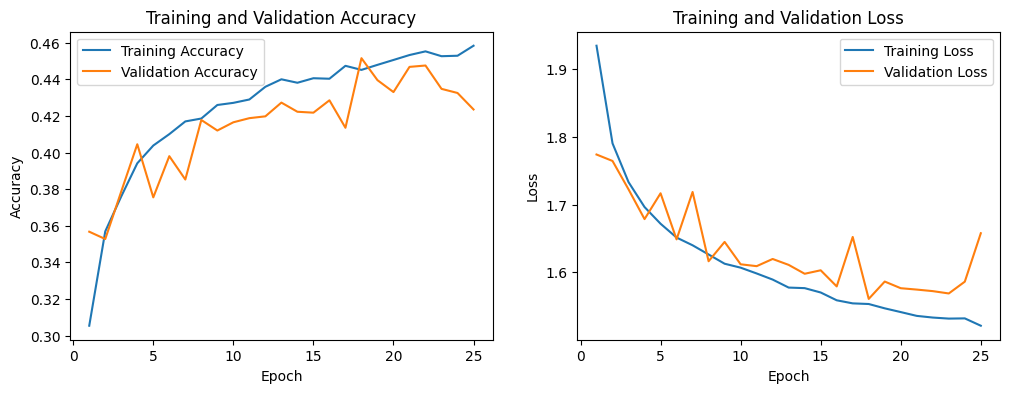

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 [==============================] - 1s 2ms/step


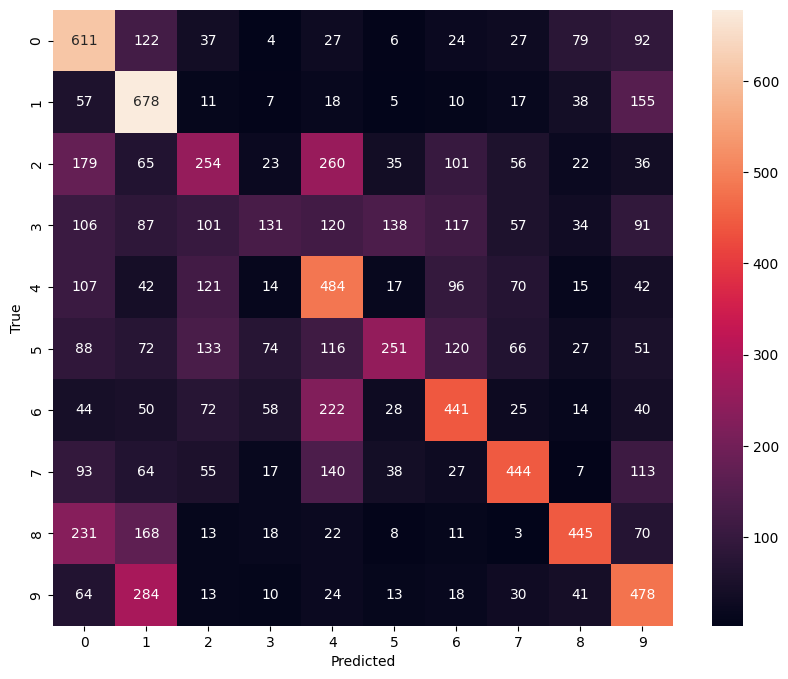

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assume model.predict returns an array of shape (n_samples, n_classes)
# with the probability of each class, which is typical for a softmax output layer.
Y_pred = model1.predict(X_test_normalized)

# The output Y_pred is two-dimensional, so we use np.argmax to get the class labels.
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Y_test is already one-dimensional (shape of (n_samples,)), so it contains the true class labels
# directly and does not require np.argmax.
# We use it as is to compute the confusion matrix.
confusion_mtx = confusion_matrix(Y_test, Y_pred_classes)

# Plotting the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Using ResNet50 to implement the same.

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
num_of_classes = 10

model2 = models.Sequential()
model2.add(layers.UpSampling2D((2,2)))
model2.add(layers.UpSampling2D((2,2)))
model2.add(layers.UpSampling2D((2,2)))
model2.add(convolutional_base)
model2.add(layers.Flatten())
model2.add(layers.BatchNormalization())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.BatchNormalization())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.BatchNormalization())
model2.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model2.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history2 = model2.fit(X_train_normalized, Y_train, batch_size=64, validation_split=0.1, epochs=10)

Epoch 1/10
563/563 [==============================] - 481s 811ms/step - loss: 1.5107 - acc: 0.4806 - val_loss: 4.5192 - val_acc: 0.0943
Epoch 2/10
563/563 [==============================] - 448s 795ms/step - loss: 0.9429 - acc: 0.6873 - val_loss: 0.7951 - val_acc: 0.7247
Epoch 3/10
563/563 [==============================] - 456s 809ms/step - loss: 0.7371 - acc: 0.7605 - val_loss: 0.8266 - val_acc: 0.7147
Epoch 4/10
563/563 [==============================] - 455s 809ms/step - loss: 0.6025 - acc: 0.8101 - val_loss: 0.6311 - val_acc: 0.7915
Epoch 5/10
563/563 [==============================] - 455s 809ms/step - loss: 0.4942 - acc: 0.8473 - val_loss: 0.8997 - val_acc: 0.7025
Epoch 6/10
563/563 [==============================] - 455s 809ms/step - loss: 0.4078 - acc: 0.8734 - val_loss: 0.6314 - val_acc: 0.7928
Epoch 7/10
563/563 [==============================] - 455s 808ms/step - loss: 0.3347 - acc: 0.8971 - val_loss: 0.6498 - val_acc: 0.7965
Epoch 8/10
563/563 [============================

In [ ]:
loss, accuracy = model2.evaluate(X_test_normalized, Y_test)
print('Test Accuracy =', accuracy)
print('Test Loss =', loss)

In [ ]:


epochs_range = range(1, len(history2.history['loss']) + 1)
loss = history2.history['loss']
val_loss = history2.history['val_loss']
acc = history2.history['acc']
val_acc = history2.history['val_acc']


plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes
Y_pred = model.predict(X_test_normalized)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
num_classes = 10

# Define the model
model3 = Sequential()

# Convolutional layers
model3.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train_normalized.shape[1:]))
model3.add(Activation('relu'))
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# Flatten layer
model3.add(Flatten())

# Fully connected layers
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))


In [ ]:
# Compile the model
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model3.fit(X_train_normalized, Y_train, batch_size=64, validation_split=0.1, epochs=10)

Epoch 1/10
482/563 [========================>.....] - ETA: 26s - loss: 1.6868 - accuracy: 0.3795

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])